In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df=pd.read_csv("../Data/economic_index.csv")

In [3]:
df.shape

(24, 6)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.2 KB


In [15]:
#drop unneccessary columns
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [16]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
count,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000
mean,11.500000,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,7.071068,0.510754,3.526299,0.349527,0.33002,210.735341
min,0.000000,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,5.750000,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,11.500000,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,17.250000,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,23.000000,2017.000000,12.000000,2.750000,6.20000,1464.000000


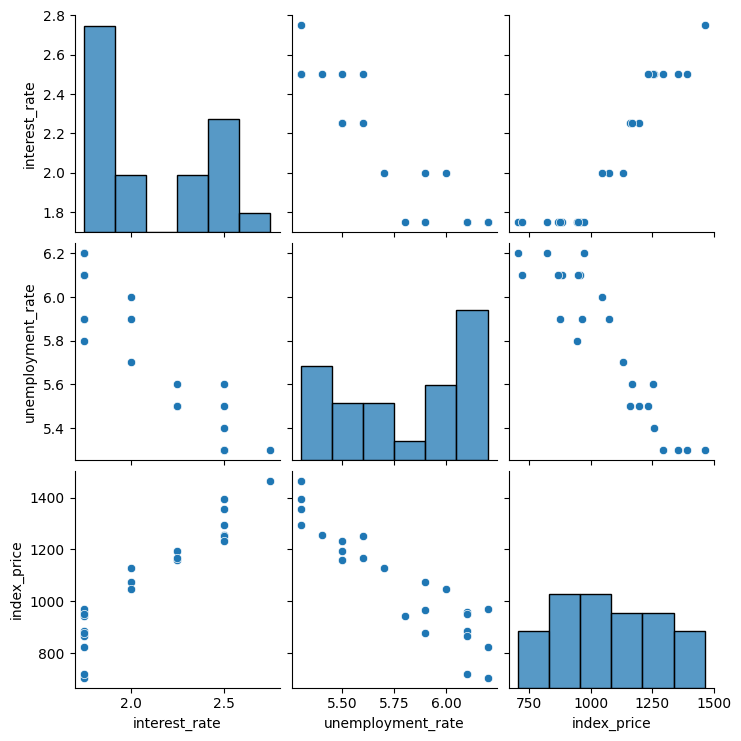

In [17]:
## Lets do some viualization
import seaborn as sns
sns.pairplot(df)

In [18]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Axes: >

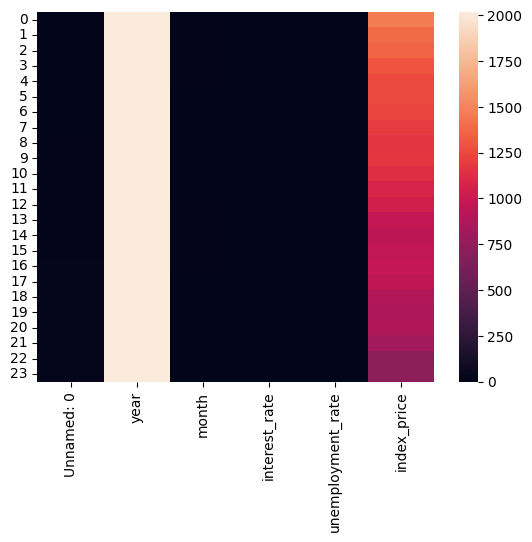

In [12]:
sns.heatmap(df)

Text(0, 0.5, 'unemployment rate')

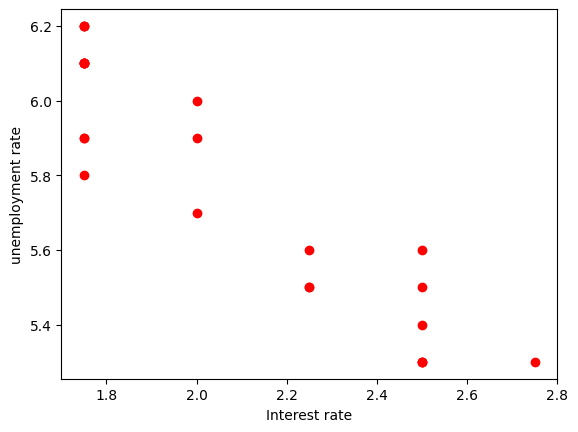

In [13]:
## Visualiza the datapoints more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

Text(0, 0.5, 'index_price')

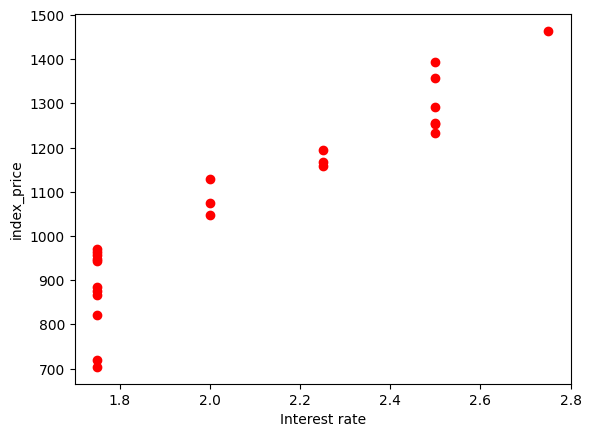

In [19]:
## Visualiza the datapoints more closely
plt.scatter(df['interest_rate'],df['index_price'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("index_price")

Text(0, 0.5, 'index_price')

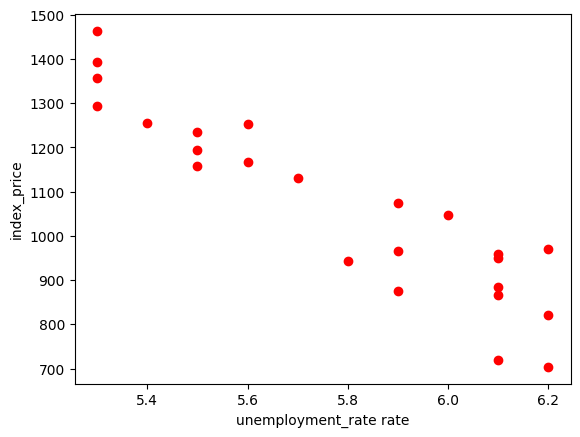

In [20]:
## Visualiza the datapoints more closely
plt.scatter(df['unemployment_rate'],df['index_price'],color='r')
plt.xlabel("unemployment_rate rate")
plt.ylabel("index_price")

In [23]:
##independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [26]:
from sklearn.model_selection import train_test_split
X_trian, X_test, y_trian,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [27]:
X_trian

,interest_rate,unemployment_rate
13,1.75,5.9
1,2.50,5.3
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3
12,2.00,6.0
15,1.75,6.1
3,2.50,5.3
4,2.50,5.4
22,1.75,6.2


In [28]:
X_test

,interest_rate,unemployment_rate
8,2.25,5.5
16,1.75,6.2
0,2.75,5.3
18,1.75,6.1
11,2.00,5.9
9,2.25,5.6


In [29]:
y_trian

13     965
1     1394
21     822
5     1254
2     1357
12    1047
15     958
3     1293
4     1256
22     704
17     949
20     876
23     719
7     1195
10    1130
14     943
19     866
6     1234
Name: index_price, dtype: int64

In [30]:
y_test

8     1159
16     971
0     1464
18     884
11    1075
9     1167
Name: index_price, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()

In [33]:
X_trian=scalar.fit_transform(X_trian)
X_test=scalar.transform(X_test)

In [34]:
X_trian

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [35]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [36]:
regmodel=linear_model.LinearRegression()
regmodel.fit(X_trian,y_trian)

LinearRegression()

In [40]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regmodel,X_trian,y_trian,scoring='neg_mean_squared_error',
                                cv=5)

In [41]:
validation_score

array([-1861.74046551, -8715.8459466 , -7707.52362191, -9169.13776461,
        -791.32842311])

In [42]:
np.mean(validation_score)

-5649.115244350756

In [44]:
## prediction
y_pred=regmodel.predict(X_test)

In [46]:
r2_score(y_test,y_pred)
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
print(regmodel.coef_)
print(regmodel.intercept_)

5793.762887712569
59.935781523235484
76.11677139574805
[  88.27275507 -116.25716066]
1053.4444444444443


### Assumptions

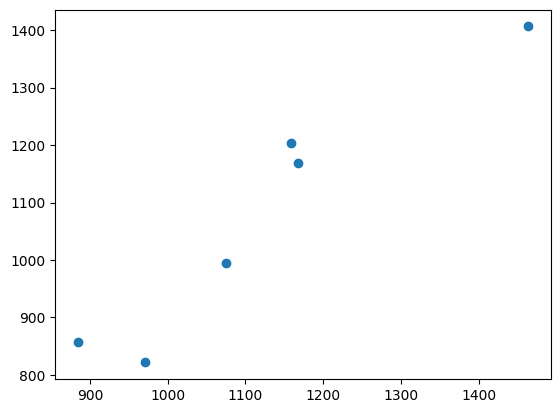

In [52]:
plt.scatter(y_test,y_pred)

In [54]:
residuals= y_test-y_pred
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

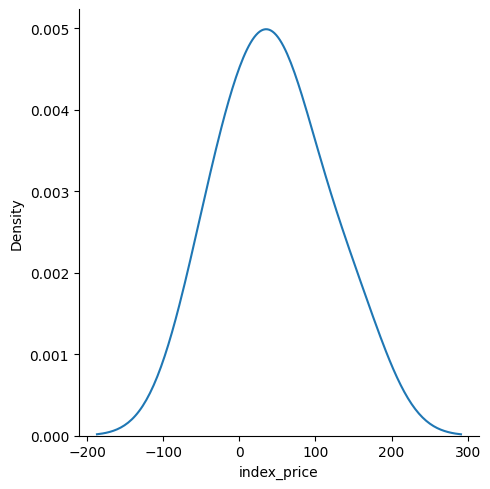

In [55]:
sns.displot(residuals, kind='kde')

In [49]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_trian,X_trian).fit()

In [51]:
model.summary()

d:\Datascience_workspace_2023\complete-machine-learning\venv\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 19 Apr 2024   Prob (F-statistic):                       0.754
Time:                        13:16:38   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""